Read n0_10M_deps17.0.stats.dat
Read n0_10M_deps17.0.traj.npy
Read n10_10M_deps17.0.stats.dat
Read n10_10M_deps17.0.traj.npy
Read n11_10M_deps17.0.stats.dat
Read n11_10M_deps17.0.traj.npy
Read n12_10M_deps17.0.stats.dat
Read n12_10M_deps17.0.traj.npy
Read n13_10M_deps17.0.stats.dat
Read n13_10M_deps17.0.traj.npy
Read n14_10M_deps17.0.stats.dat
Read n14_10M_deps17.0.traj.npy
Read n15_10M_deps17.0.stats.dat
Read n15_10M_deps17.0.traj.npy
Read n1_10M_deps17.0.stats.dat
Read n1_10M_deps17.0.traj.npy
Read n2_10M_deps17.0.stats.dat
Read n2_10M_deps17.0.traj.npy
Read n3_10M_deps17.0.stats.dat
Read n3_10M_deps17.0.traj.npy
Read n4_10M_deps17.0.stats.dat
Read n4_10M_deps17.0.traj.npy
Read n5_10M_deps17.0.stats.dat
Read n5_10M_deps17.0.traj.npy
Read n6_10M_deps17.0.stats.dat
Read n6_10M_deps17.0.traj.npy
Read n7_10M_deps17.0.stats.dat
Read n7_10M_deps17.0.traj.npy
Read n8_10M_deps17.0.stats.dat
Read n8_10M_deps17.0.traj.npy
Read n9_10M_deps17.0.stats.dat
Read n9_10M_deps17.0.traj.npy
Read o11_10M

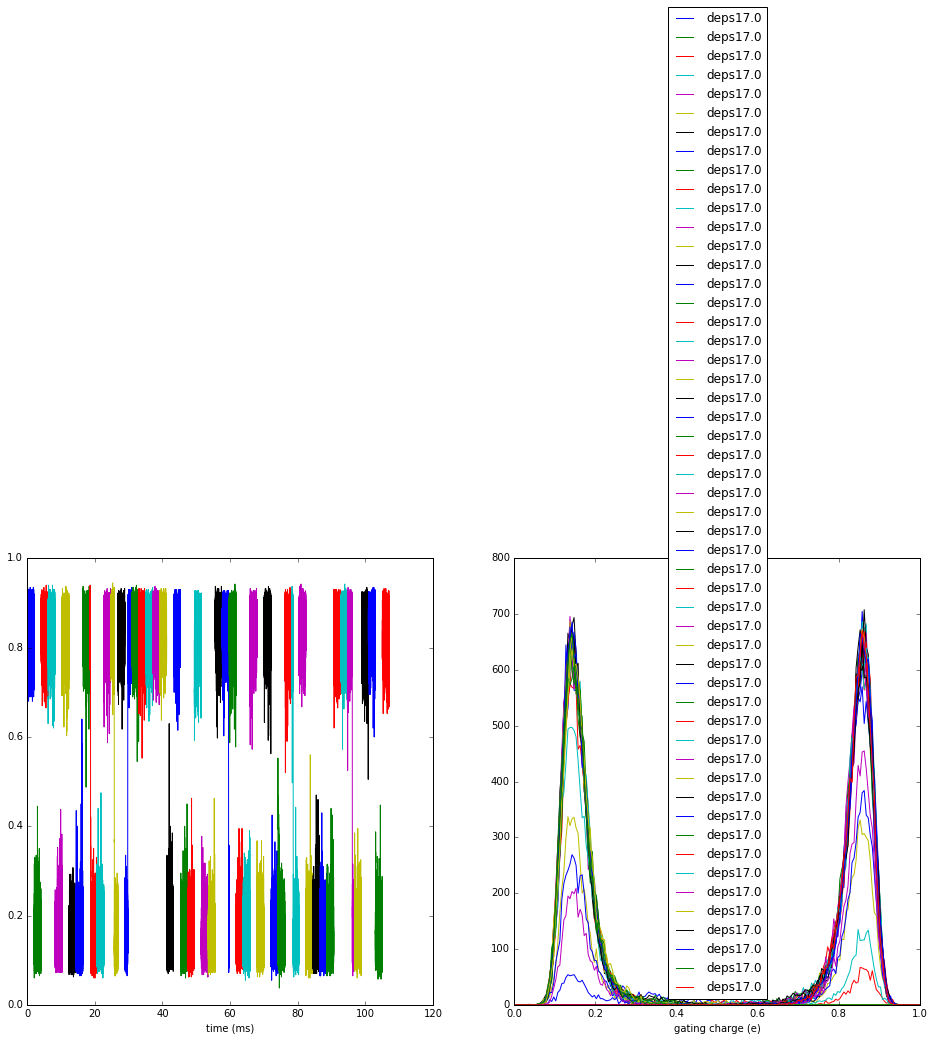

In [141]:
import glob

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from IsingTrajectory import *

t = IsingTrajectory()

skip_frames = 1

dq = 1.0/(20*20)   # gating charge/ncells

plt.figure(figsize=(16,8))

#ntrials = 20
#my_depsilons = [(this_depsilon = 24.0 - trial*0.5) for trial in range(ntrials)]

filenames = glob.glob('*_10M_*17.0*.npy')
ntrials = len(filenames)

start_time = 0.0

for trial in range(ntrials):
    
    #this_depsilon = 24.0 - trial*0.5
    
    plt.subplot(1,2,1)
    #t.load('trj%d_10M'%trial)
    t.load(filenames[trial].replace('.traj.npy',''))
    # Let's make a time trace of the gating charge
    timepoints = start_time + t.stats[skip_frames:,0]
    gating_charge = dq*t.traj[skip_frames:,:].sum(axis=1)
    plt.plot(timepoints*1000.0, gating_charge)   # convert to ms
    start_time += t.stats[-1,0]
    plt.xlabel('time (ms)')

    plt.subplot(1,2,2)
    # Let's make a histogram of the gating charge
    qbins = np.arange(0.0, 1.0+2*dq, 2*dq)
    qcenters = (qbins[0:-1]+qbins[1:])/2.0
    counts, edges = np.histogram(dq*t.traj[skip_frames:,:].sum(axis=1), bins=qbins)
    mylabel = (filenames[trial].split('_')[2]).replace('.traj.npy','')
    plt.plot(qcenters,counts, label=mylabel)
    plt.xlabel('gating charge (e)')

plt.legend(loc='best')


## Clustering and visualization
See: http://msmbuilder.org/3.7.0/examples/Fs-Peptide-in-RAM.html

(10000, 4)
(10000,)


/Users/vv/anaconda/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:1300: RuntimeWarning: init_size=300 should be larger than k=1000. Setting it to 3*k
  init_size=init_size)


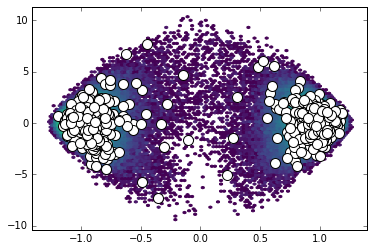

In [134]:
from msmbuilder.cluster import MiniBatchKMeans
clusterer = MiniBatchKMeans(n_clusters=1000, random_state=42)
clustered_trajs = clusterer.fit_transform(tica_coords)

print(tica_coords[0].shape)
print(clustered_trajs[0].shape)

txx = np.concatenate(tica_coords)
plt.hexbin(txx[:,0], txx[:,1], bins='log', mincnt=1, cmap='viridis')
plt.scatter(clusterer.cluster_centers_[:,0],
            clusterer.cluster_centers_[:,1], 
            s=100, c='w')

In [135]:
from msmbuilder.msm import MarkovStateModel
msm = MarkovStateModel(lag_time=1, n_timescales=20)
msm.fit(clustered_trajs)

print msm.timescales_
print 'in seconds:', 3.0e-7*msm.timescales_

MSM contains 1 strongly connected component above weight=1.00. Component 0 selected, with population 100.000000%


MarkovStateModel(ergodic_cutoff='on', lag_time=1, n_timescales=20,
         prior_counts=0, reversible_type='mle', sliding_window=True,
         verbose=True)

[ 304.00399075    4.6485217     3.7164353     3.44291907    3.23107941
    2.96805095    2.60390779    2.51758373    2.25237142    2.05173074
    2.00858698    1.9536717     1.87567376    1.84762878    1.81041724
    1.78310078    1.69764406    1.67472028    1.64842585    1.59608497]
in seconds: [  9.12011972e-05   1.39455651e-06   1.11493059e-06   1.03287572e-06
   9.69323822e-07   8.90415284e-07   7.81172338e-07   7.55275120e-07
   6.75711425e-07   6.15519223e-07   6.02576093e-07   5.86101509e-07
   5.62702127e-07   5.54288634e-07   5.43125172e-07   5.34930233e-07
   5.09293217e-07   5.02416083e-07   4.94527755e-07   4.78825492e-07]


[-23.84648875 -22.54121765 -21.86719831 -24.19210644 -24.29753114
 -23.14889117 -22.20549864 -22.40044067 -24.16926885 -22.89219878
 -21.85457016 -23.3716051  -23.97932774 -23.31294519 -21.42768696
 -21.88901147 -23.75053915 -23.60106328 -22.2958534  -22.29157045
 -24.19591936 -24.65167832 -24.07768907 -24.13989494 -24.29930427
 -25.39723027 -23.1863919  -22.4407058  -22.13451459 -23.1318264
 -23.05444786 -22.98063445 -24.32957421 -22.87714173 -27.65483709
 -22.80992031 -21.006524   -22.15876127 -22.90497192 -24.04804216
 -23.69112517 -22.69247232 -22.90668703 -24.14238744 -23.51796684
 -23.00238254 -25.82080247 -22.49974341 -22.19034841 -23.74485996
 -23.20772723 -23.45307103 -23.27850274 -22.84131905 -22.93821866
 -23.30329402 -22.99757237 -24.89053294 -23.47634054 -24.88826296
 -22.8024522  -23.03533013 -22.43893057 -22.13931275 -24.23691758
 -22.68223621 -24.26256306 -23.10744235 -22.86130006 -24.67792365
 -23.35147487 -20.94520378 -25.97554184 -22.38949979 -23.50532617
 -25.932361

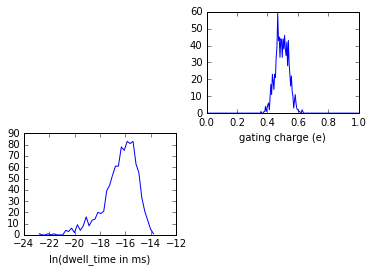

In [24]:


plt.subplot(2,2,3)
# Let's make a histogram of the ln(dwell time )
print np.log(t.stats[skip_frames:,1])
dwell_times_in_ms = t.stats[1:,1]*1000.0
counts, bin_edges = np.histogram(np.log(dwell_times_in_ms), bins=40)
bin_centers = (bin_edges[0:-1]+bin_edges[1:])/2.0
plt.plot(bin_centers,counts)
plt.xlabel('ln(dwell_time in ms)')








### animations!

Following instructions from http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/


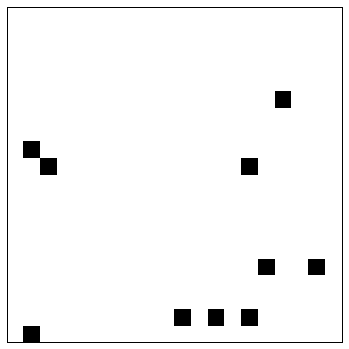

In [3]:
from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots( figsize=(6,6) )

ax.set_xlim(( 0, 20))
ax.set_ylim((0, 20))
plt.xticks([])
plt.yticks([])

# load in trajectory?
# t = 

# 1000 frames makes a nice animation
animation_frames = 1000
traj_stride = t.nframes/animation_frames

z = t.traj[0].reshape( (20,20))
quad = plt.pcolor(z, cmap='Greys')


# initialization function: plot the background of each frame
def init():
    z = t.traj[0].reshape( (20,20))
    #quad = plt.pcolor(z, cmap='Greys')

    quad.set_array(np.nan)
    return (quad,)

# animation function. This is called sequentially
def animate(i, stride=traj_stride):
    z = t.traj[stride*i].reshape((20,20))
    #quad = plt.pcolor(z, cmap='Greys')
    quad.set_array(z.ravel())
    #plt.title('Phase: %.2f'%i)
    return (quad,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=20, blit=True)

HTML(anim.to_html5_video())